In [ ]:
!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
apple = yf.download('AAPL')
apple

In [3]:
apple.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
apple.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-01-23 00:00:00-05:00', '2023-01-24 00:00:00-05:00',
               '2023-01-25 00:00:00-05:00', '2023-01-26 00:00:00-05:00',
               '2023-01-27 00:00:00-05:00', '2023-01-30 00:00:00-05:00',
               '2023-01-31 00:00:00-05:00', '2023-02-01 00:00:00-05:00',
               '2023-02-02 00:00:00-05:00', '2023-02-03 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10626, freq=None)

In [5]:
apple.index = apple.index.strftime('%Y-%m-%d')

In [6]:
apple.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
       '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03'],
      dtype='object', name='Date', length=10626)

<AxesSubplot:xlabel='Date'>

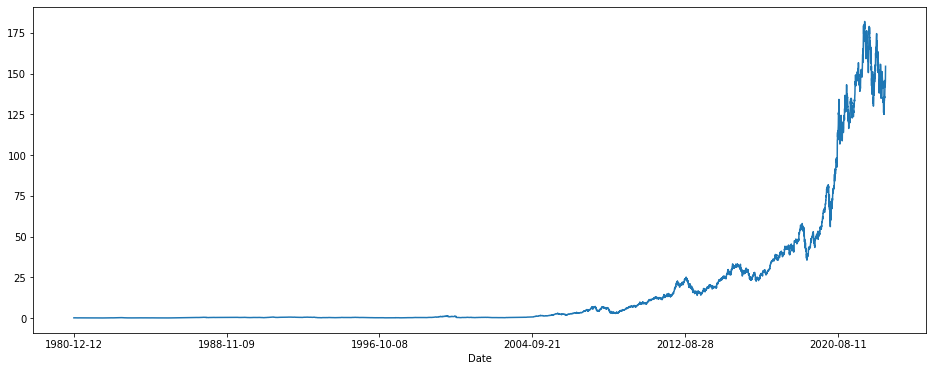

In [7]:
apple['Close'].plot(figsize=(16,6))

In [8]:
apple = apple.loc[(apple.index > '2004-09-21')]

<AxesSubplot:xlabel='Date'>

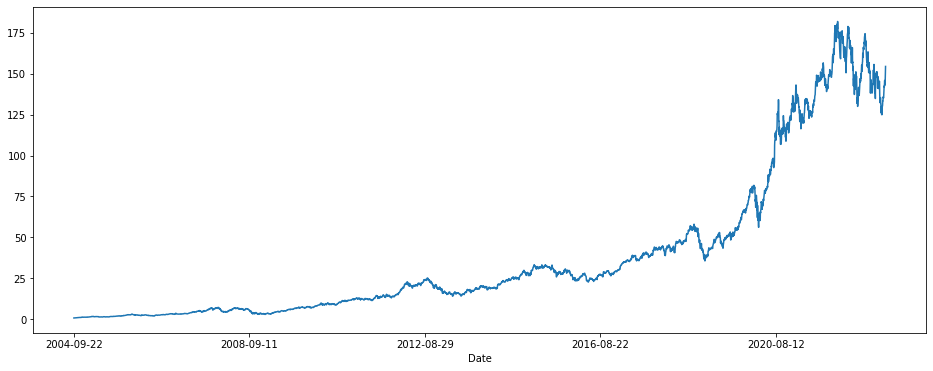

In [9]:
apple['Close'].plot(figsize=(16,6))

In [11]:
apple.shape

(4625, 6)

In [21]:
apple_data = apple[['Close']]

In [26]:
length_of_training_data = math.ceil(len(apple_data.values)*0.8)

length_of_training_data

3700

In [27]:
scaler = MinMaxScaler()
scaled_apple_data = scaler.fit_transform(apple_data.values)

scaled_apple_data

array([[0.00000000e+00],
       [3.44634123e-05],
       [3.64321491e-05],
       ...,
       [7.98291376e-01],
       [8.28012874e-01],
       [8.48305007e-01]])

In [32]:
training_apple_data = scaled_apple_data[:length_of_training_data,:]

In [52]:
x_train = []
y_train = []

for i in range(90, len(training_apple_data)):
    x_train.append(training_apple_data[i-90:i, 0])
    y_train.append(training_apple_data[i, 0])
    
    if i <= 91:
        print(x_train)
        print(y_train)

[array([0.00000000e+00, 3.44634123e-05, 3.64321491e-05, 6.00658654e-05,
       1.10283445e-04, 1.73299458e-04, 1.80192009e-04, 1.72318048e-04,
       1.84134741e-04, 2.41245201e-04, 3.66295816e-04, 2.65860327e-04,
       2.10718605e-04, 1.64438170e-04, 1.34898572e-04, 2.78658760e-04,
       7.93644495e-04, 8.44849072e-04, 1.06640329e-03, 1.03390829e-03,
       1.03883243e-03, 1.08510728e-03, 1.03292129e-03, 1.04670672e-03,
       1.08806301e-03, 1.31749119e-03, 1.50359467e-03, 1.52427298e-03,
       1.52919712e-03, 1.63258801e-03, 1.81081720e-03, 1.72613029e-03,
       1.75271974e-03, 1.71923774e-03, 1.68674833e-03, 1.75567548e-03,
       1.80983020e-03, 1.82952119e-03, 1.80392432e-03, 1.77437947e-03,
       1.77044232e-03, 1.81869149e-03, 1.79703177e-03, 2.40555979e-03,
       2.39768024e-03, 2.67142011e-03, 2.72065628e-03, 3.10369359e-03,
       2.96682070e-03, 3.03969025e-03, 2.78564103e-03, 2.53652121e-03,
       2.84177008e-03, 2.55719985e-03, 2.59560041e-03, 2.66551456e-03,
     

In [53]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train.shape

(3610, 90)

In [55]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train_reshaped

array([[[0.00000000e+00],
        [3.44634123e-05],
        [3.64321491e-05],
        ...,
        [3.47885595e-03],
        [3.51725651e-03],
        [3.64920001e-03]],

       [[3.44634123e-05],
        [3.64321491e-05],
        [6.00658654e-05],
        ...,
        [3.51725651e-03],
        [3.64920001e-03],
        [3.93672564e-03]],

       [[3.64321491e-05],
        [6.00658654e-05],
        [1.10283445e-04],
        ...,
        [3.64920001e-03],
        [3.93672564e-03],
        [3.99876024e-03]],

       ...,

       [[2.07695438e-01],
        [2.08550128e-01],
        [2.06868302e-01],
        ...,
        [2.42062539e-01],
        [2.40890789e-01],
        [2.42159047e-01]],

       [[2.08550128e-01],
        [2.06868302e-01],
        [2.13843734e-01],
        ...,
        [2.40890789e-01],
        [2.42159047e-01],
        [2.37706355e-01]],

       [[2.06868302e-01],
        [2.13843734e-01],
        [2.11831071e-01],
        ...,
        [2.42159047e-01],
        [2.3770

In [76]:
model = Sequential()

model.add(LSTM(50, return_sequences=False, input_shape=(x_train_reshaped.shape[1], 1)))

#model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

model.compile('adam', loss='mean_squared_error')

In [78]:
model.fit(x_train_reshaped, y_train, batch_size=1, epochs=1)

3610/3610 [==============================] - 36s 10ms/step - loss: 2.4694e-05


In [79]:
testing_data = scaled_apple_data[length_of_training_data-90:, :]

x_test = []
y_test = apple_data.values[length_of_training_data:, :]

for i in range(90, len(testing_data)):
    x_test.append(testing_data[i-90:i, 0])

In [80]:
x_test = np.array(x_test)

x_test_reshaped = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [81]:
prediction_values = model.predict(x_test)

29/29 [==============================] - 0s 6ms/step


In [82]:
prediction_values = scaler.inverse_transform(prediction_values)

rmse = np.sqrt(np.mean(prediction_values-y_test)**2)

rmse

0.6718682119008658

C:\Users\c2081161\AppData\Local\Temp/ipykernel_32500/3481729758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_dataset['Predictions'] = prediction_values


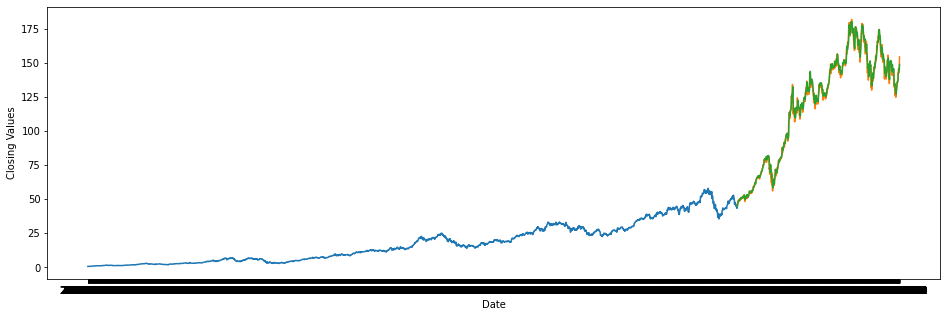

In [83]:
training_dataset = apple[:length_of_training_data]
validation_dataset = apple[length_of_training_data:]
validation_dataset['Predictions'] = prediction_values

plt.figure(figsize=(16,5))
plt.xlabel('Date')
plt.ylabel('Closing Values')
plt.plot(training_dataset['Close'])
plt.plot(validation_dataset[['Close', 'Predictions']])
plt.show()